#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

170500096/170498071 [==============================] - 125s 1us/step


In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [10]:
#針對Label 做 ONE HOT ENCODE
y_label_train_OneHot = tf.keras.utils.to_categorical(y_label_train)
y_label_test_OneHot = tf.keras.utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [12]:
model = tf.keras.Sequential()

In [9]:
#卷積層1

In [13]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [14]:
model.add(Dropout(rate=0.25))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [13]:
#卷積層2與池化層2

In [16]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [17]:
model.add(Dropout(0.25))

In [18]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [17]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [19]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [20]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [21]:
model.add(Dense(10, activation='softmax'))

In [22]:
#檢查model 的STACK
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

# 載入之前訓練的模型

In [22]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_history, func_name):
    plt.plot(train_history.history['accuracy'])
    plt.plot(train_history.history['val_accuracy'])
    plt.title('Train History w/ Loss Function={}'.format(func_name))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 3s 89us/sample - loss: 0.0893 - accuracy: 0.1474 - val_loss: 0.0893 - val_accuracy: 0.1954
Epoch 2/12
37500/37500 [==============================] - 3s 71us/sample - loss: 0.0892 - accuracy: 0.1508 - val_loss: 0.0892 - val_accuracy: 0.2027
Epoch 3/12
37500/37500 [==============================] - 3s 70us/sample - loss: 0.0890 - accuracy: 0.1563 - val_loss: 0.0892 - val_accuracy: 0.2089
Epoch 4/12
37500/37500 [==============================] - 3s 70us/sample - loss: 0.0890 - accuracy: 0.1601 - val_loss: 0.0891 - val_accuracy: 0.2158
Epoch 5/12
37500/37500 [==============================] - 3s 70us/sample - loss: 0.0888 - accuracy: 0.1633 - val_loss: 0.0890 - val_accuracy: 0.2218
Epoch 6/12
37500/37500 [==============================] - 3s 70us/sample - loss: 0.0887 - accuracy: 0.1693 - val_loss: 0.0889 - val_accuracy: 0.2254
Epoch 7/12
37500/37500 [==============================] 

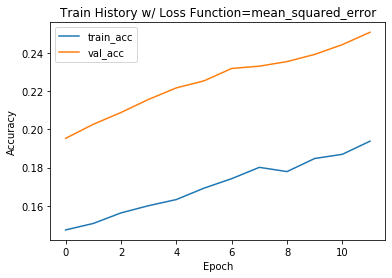

In [28]:
#MSE

loss_func = 'mean_squared_error'

model.compile(loss=loss_func, optimizer='sgd', metrics=['accuracy'])

train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

show_train_history(train_history, loss_func)

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 4s 93us/sample - loss: 0.3115 - accuracy: 0.9000 - val_loss: 0.3122 - val_accuracy: 0.9000
Epoch 2/12
37500/37500 [==============================] - 3s 73us/sample - loss: 0.3068 - accuracy: 0.9000 - val_loss: 0.3081 - val_accuracy: 0.9000
Epoch 3/12
37500/37500 [==============================] - 3s 71us/sample - loss: 0.3014 - accuracy: 0.9000 - val_loss: 0.3034 - val_accuracy: 0.9000
Epoch 4/12
37500/37500 [==============================] - 3s 70us/sample - loss: 0.2967 - accuracy: 0.9001 - val_loss: 0.2997 - val_accuracy: 0.9000
Epoch 5/12
37500/37500 [==============================] - 3s 72us/sample - loss: 0.2935 - accuracy: 0.9003 - val_loss: 0.2967 - val_accuracy: 0.9000
Epoch 6/12
37500/37500 [==============================] - 3s 70us/sample - loss: 0.2902 - accuracy: 0.9006 - val_loss: 0.2942 - val_accuracy: 0.9000
Epoch 7/12
37500/37500 [==============================] 

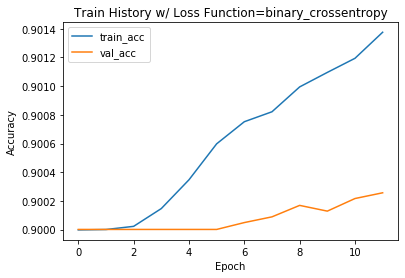

In [29]:
#binary crossentropy
loss_func = 'binary_crossentropy'

model.compile(loss=loss_func, optimizer='sgd', metrics=['accuracy'])

train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

show_train_history(train_history, loss_func)